# 1. THÔNG TIN NHÓM

5 Thành viên:
- `18120507` Trương Công Phu
- `18120514` Phan Thiên Phúc
- `18120517` Nguyễn Công Bình Phương
- `18120532` Nguyễn Hoàng Sang
- `18120626` Đặng Quang Trường 

# 2. XỬ LÍ DỮ LIỆU

## import module

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import geopandas
plt.style.use('bmh')

In [6]:
data = pd.read_csv('2021-04-22.csv')
data.head()

,Unnamed: 0,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop\n,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl
0,0,NaN,World,"144,133,088","+588,907","3,064,673","+7,692","122,586,006","+432,002","18,482,409","109,445","18,491",393.2,NaN,NaN,NaN,All,\n,NaN,NaN
1,1,1.0,USA,"32,551,107","+14,637","582,665",+209,"25,108,546","+3,011","6,859,896","10,036","97,881","1,752","432,173,530","1,299,541","332,558,517",North America,10,571,1
2,2,2.0,India,"15,880,534","+271,530","184,168","+1,598","13,405,177","+135,314","2,291,189","8,944","11,418",132,"271,053,392","194,881","1,390,864,355",Asia,88,"7,552",5
3,3,3.0,Brazil,"14,050,885",NaN,"378,530",NaN,"12,561,689",NaN,"1,110,666","8,318","65,729","1,771","28,600,000","133,789","213,770,046",South America,15,565,7
4,4,4.0,France,"5,339,920",NaN,"101,597",NaN,"4,181,006",NaN,"1,057,317","5,984","81,663","1,554","72,873,077","1,114,447","65,389,433",Europe,12,644,1


### reset index, Xóa 3 cột cuối, sửa tên cột

In [7]:
data = data.drop(['Unnamed: 0', '#','1 Caseevery X ppl','1 Deathevery X ppl','1 Testevery X ppl'],axis=1)
Toltal = data.iloc[0]
data = data.drop(0, axis =0)
data = data.rename(columns={'Tests/\n1M pop\n':'Tests/1M pop'},inplace= False)
data = data.set_index(np.arange(len(data)), drop = True)
data.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,"32,551,107","+14,637","582,665",+209,"25,108,546","+3,011","6,859,896","10,036","97,881","1,752","432,173,530","1,299,541","332,558,517",North America
1,India,"15,880,534","+271,530","184,168","+1,598","13,405,177","+135,314","2,291,189","8,944","11,418",132,"271,053,392","194,881","1,390,864,355",Asia
2,Brazil,"14,050,885",NaN,"378,530",NaN,"12,561,689",NaN,"1,110,666","8,318","65,729","1,771","28,600,000","133,789","213,770,046",South America
3,France,"5,339,920",NaN,"101,597",NaN,"4,181,006",NaN,"1,057,317","5,984","81,663","1,554","72,873,077","1,114,447","65,389,433",Europe
4,Russia,"4,727,125","+8,271","106,706",+399,"4,352,873","+9,644","267,546","2,300","32,381",731,"126,500,000","866,529","145,984,714",Europe


### Kiểm tra kiểu dữ liệu

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country,Other     221 non-null    object
 1   TotalCases        221 non-null    object
 2   NewCases          109 non-null    object
 3   TotalDeaths       221 non-null    object
 4   NewDeaths         86 non-null     object
 5   TotalRecovered    221 non-null    object
 6   NewRecovered      96 non-null     object
 7   ActiveCases       221 non-null    object
 8   Serious,Critical  149 non-null    object
 9   Tot Cases/1M pop  219 non-null    object
 10  Deaths/1M pop     205 non-null    object
 11  TotalTests        210 non-null    object
 12  Tests/1M pop      210 non-null    object
 13  Population        221 non-null    object
 14  Continent         219 non-null    object
dtypes: object(15)
memory usage: 35.7+ KB


- Các cột được chia ra thành hai hai kiểu dữ liệu đó là:
    + cate_cols: bao gồm hai cột là : 'Country,Other','Continent'
    + numberic_cols: bao gồm các cột còn lại.

### Xử lí dữ liệu số

- Cách làm:
    + Xóa dấu '+' đứng trước mỗi giá trị.
    + Điền các giá trị thiếu bằng '0'
    + Chuyển đổi kiểu dữ liệu từ object sang kiểu int64

In [10]:
cate_cols = ['Country,Other','Continent']
numberic_cols = data.columns.difference(cate_cols)
data[numberic_cols] = data[numberic_cols].apply\
(lambda x: x.str.replace(re.compile(r'[+.,]'), '').replace(' ',np.nan)).fillna('0').astype('int64')
data.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,32551107,14637,582665,209,25108546,3011,6859896,10036,97881,1752,432173530,1299541,332558517,North America
1,India,15880534,271530,184168,1598,13405177,135314,2291189,8944,11418,132,271053392,194881,1390864355,Asia
2,Brazil,14050885,0,378530,0,12561689,0,1110666,8318,65729,1771,28600000,133789,213770046,South America
3,France,5339920,0,101597,0,4181006,0,1057317,5984,81663,1554,72873077,1114447,65389433,Europe
4,Russia,4727125,8271,106706,399,4352873,9644,267546,2300,32381,731,126500000,866529,145984714,Europe


* Xử lí dữ liệu continent

In [11]:
data[cate_cols].isna().sum()

Country,Other    0
Continent        2
dtype: int64

In [12]:
data[data.Continent.isna()]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
214,Diamond Princess,712,0,13,0,699,0,0,0,0,0,0,0,0,NaN
216,MS Zaandam,9,0,2,0,7,0,0,0,0,0,0,0,0,NaN


- Sau khi tìm hiểu Diamond Princess và MS Zaandam là hai du thuyền bị nhiễm corona nên sẽ điền vào ở thuộc tính Continent là Ship

In [13]:
data[cate_cols] = data[cate_cols].fillna('Ship')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country,Other     221 non-null    object
 1   TotalCases        221 non-null    int64 
 2   NewCases          221 non-null    int64 
 3   TotalDeaths       221 non-null    int64 
 4   NewDeaths         221 non-null    int64 
 5   TotalRecovered    221 non-null    int64 
 6   NewRecovered      221 non-null    int64 
 7   ActiveCases       221 non-null    int64 
 8   Serious,Critical  221 non-null    int64 
 9   Tot Cases/1M pop  221 non-null    int64 
 10  Deaths/1M pop     221 non-null    int64 
 11  TotalTests        221 non-null    int64 
 12  Tests/1M pop      221 non-null    int64 
 13  Population        221 non-null    int64 
 14  Continent         221 non-null    object
dtypes: int64(13), object(2)
memory usage: 35.7+ KB


In [14]:
# Lưu lại dữ liệu đã xử lí
data.to_csv('2021-04-22_copy.csv')

# 3. PHÂN TÍCH TỔNG QUAN

In [17]:
df = pd.read_csv('2021-04-22_copy.csv', index_col=0)
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,USA,32551107,14637,582665,209,25108546,3011,6859896,10036,97881,1752,432173530,1299541,332558517,North America
1,India,15880534,271530,184168,1598,13405177,135314,2291189,8944,11418,132,271053392,194881,1390864355,Asia
2,Brazil,14050885,0,378530,0,12561689,0,1110666,8318,65729,1771,28600000,133789,213770046,South America
3,France,5339920,0,101597,0,4181006,0,1057317,5984,81663,1554,72873077,1114447,65389433,Europe
4,Russia,4727125,8271,106706,399,4352873,9644,267546,2300,32381,731,126500000,866529,145984714,Europe


## Tổng hợp toàn cầu

In [35]:
df_t = pd.DataFrame(df[["TotalCases","TotalDeaths",  "TotalRecovered", "ActiveCases"]].sum(axis=0)).transpose()
df_t.style.background_gradient(cmap='Wistia', axis=1)

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
0,144133088,3064673,122586006,18482409


## Tổng hợp giữa các châu lục

In [61]:
df_t = df[["TotalCases","TotalDeaths",  "TotalRecovered", "ActiveCases", "Continent"]].groupby('Continent').sum()
df_t.style.background_gradient(cmap='Wistia',subset=["TotalCases"])\
           .background_gradient(cmap='Blues',subset=["TotalDeaths"])\
           .background_gradient(cmap='Greens',subset=["TotalRecovered"])\
           .background_gradient(cmap='Purples',subset=["ActiveCases"])

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
Continent,,,,
Africa,4492465,118976,4014897,358592
Asia,35074735,477860,30326081,4270794
Australia/Oceania,61764,1176,41343,19245
Europe,43250842,985738,37630909,4634195
North America,37608855,849610,29279977,7479268
Ship,721,15,706,0
South America,23643706,631298,21292093,1720315


## Tổng hợp giữa các nước

In [63]:
df_t = df[["TotalCases","TotalDeaths",  "TotalRecovered", "ActiveCases", "Country,Other"]].groupby("Country,Other").sum()
df_t.style.background_gradient(cmap='Wistia',subset=["TotalCases"])\
           .background_gradient(cmap='Blues',subset=["TotalDeaths"])\
           .background_gradient(cmap='Greens',subset=["TotalRecovered"])\
           .background_gradient(cmap='Purples',subset=["ActiveCases"])

,TotalCases,TotalDeaths,TotalRecovered,ActiveCases
"Country,Other",,,,
Afghanistan,58346,2561,52301,3484
Albania,129980,2358,103066,24556
Algeria,120174,3172,83765,33237
Andorra,12917,123,12334,460
Angola,24661,565,22647,1449
Anguilla,29,0,25,4
Antigua and Barbuda,1217,31,995,191
Argentina,2743620,59792,2407853,275975
Armenia,210518,3944,190271,16303


## Cùng xem top các quốc gia có số lượng lớn về các cột dữ liệu

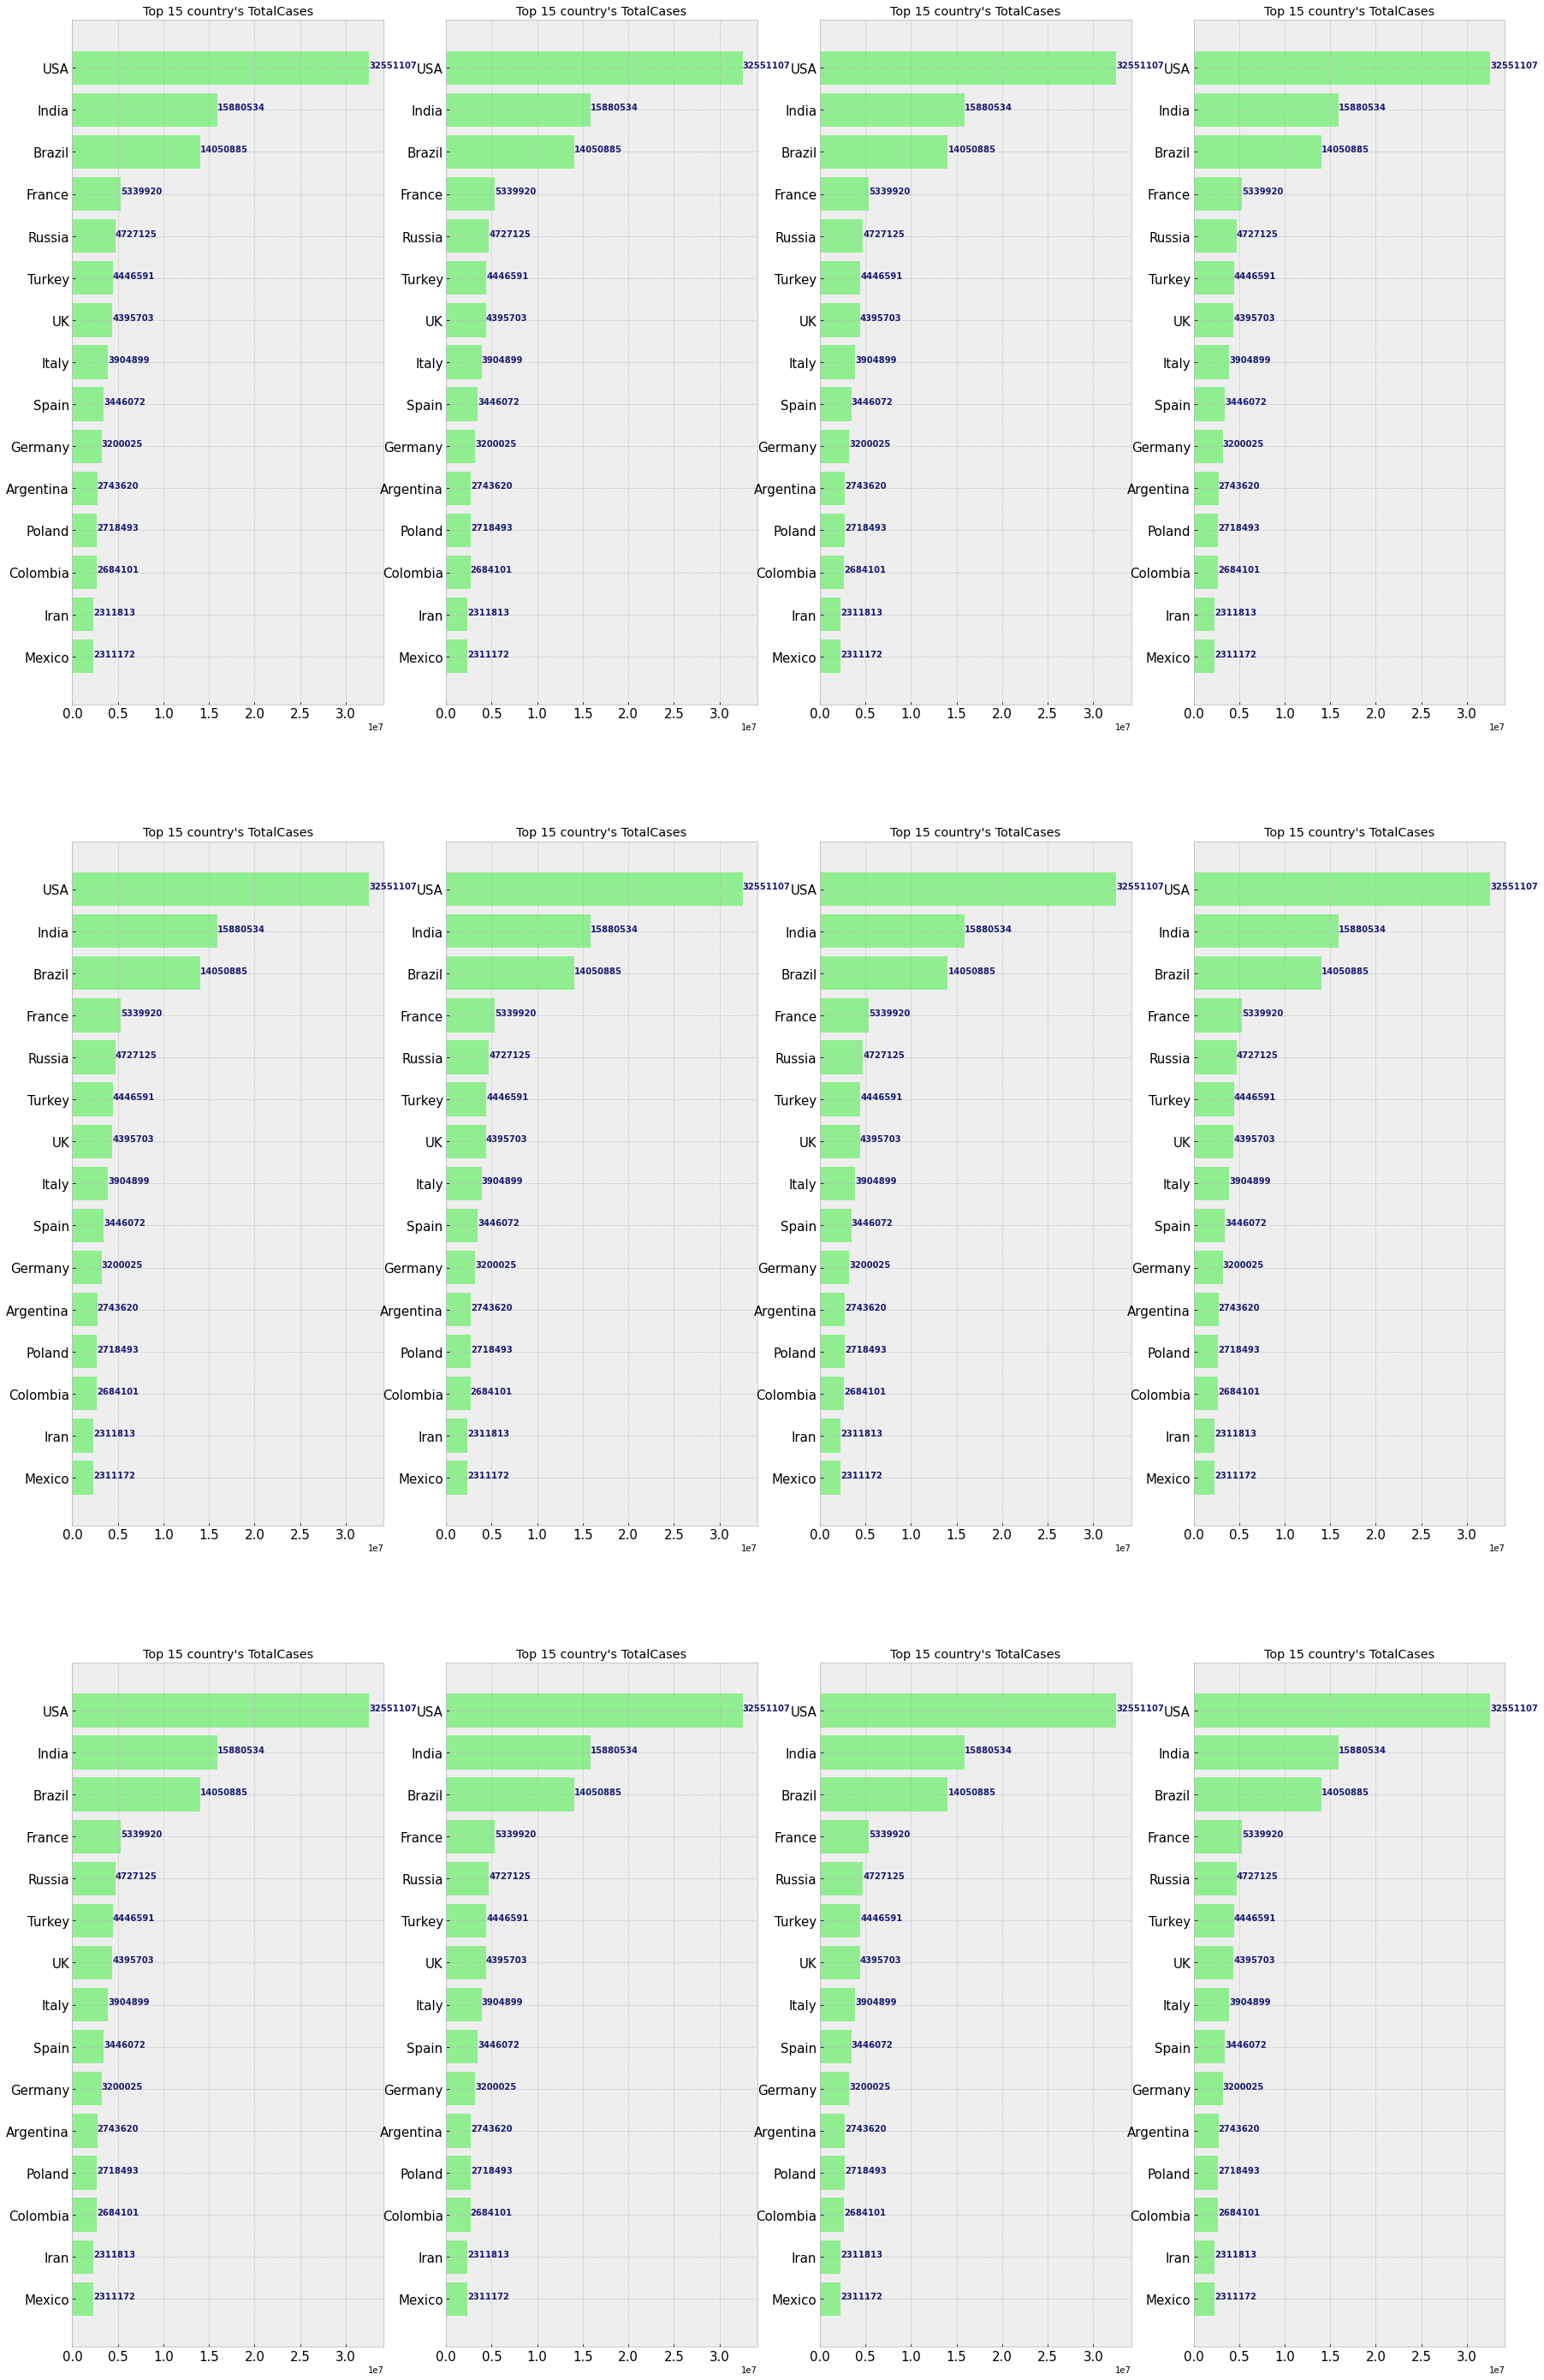

In [82]:
def get_top_15_of_feature(df, feature, ax, num_top=15):
    data = df[feature].sort_values(ascending=False)[0:num_top][::-1]
    ax.barh(y=df['Country,Other'].iloc[data.index], width=data, color='lightgreen')
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.set_title("Top 15 country's " + feature)
    for i, v in enumerate(data):
        ax.text(v + 0.25, i, str(round(v,2)), color='midNightBlue', fontweight='bold')


fig, ax = plt.subplots(3,4, figsize=(30,50))
features = ['TotalCases', 'NewCases', 'TotalDeaths', 'TotalRecovered', 
            'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 
            'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'Population']
index = 0
for i in range(3):
    for j in range(4):
        get_top_15_of_feature(df, feature=features[index], ax=ax[i][j])

# 4. MỐI QUAN HỆ TRONG DỮ LIỆU